# 🚲 01. 탐색적 데이터 분석 (EDA)

## 1. 프로젝트 개요


본 프로젝트는 자전거 대여 시스템의 운영 데이터를 분석하고, 이를 기반으로 자전거 대여 수요를 예측하는 모델을 개발하는 것을 목표로 한다.  
프로젝트의 최종 목표는 RMSLE (Root Mean Squared Logarithmic Error)를 최소화하는 예측 모델을 구축하는 것이다.

EDA 단계에서는 데이터의 기본 구조와 변수별 특성을 파악하고, 변수 간의 관계를 분석하고자 한다.
본 단계에서 확인한 주요 결과는 피처 엔지니어링과 모델링 단계에 반영할 것이다.

## 2. 데이터 불러오기 및 확인


In [2]:
import pandas as pd 

In [3]:
test = pd.read_csv(r'D:\python\코드잇 스프린트 데분\codeit-sprint-projects\sprint-missions\스프린트 미션 12\data\raw\test.csv')
train = pd.read_csv(r'D:\python\코드잇 스프린트 데분\codeit-sprint-projects\sprint-missions\스프린트 미션 12\data\raw\train.csv')

print("Train 데이터 크기:", train.shape)
print("Test 데이터 크기:", test.shape) 

Train 데이터 크기: (10886, 12)
Test 데이터 크기: (6493, 9)


In [4]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [6]:
test.describe(include='all')

# test 데이터는 casual	registered	count 이 변수들이 없음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
unique,6493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,NaN,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900


In [7]:
# datetime 컬럼을 datetime 타입으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

# datetime에서 파생 변수 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday  # 0=월요일, 6=일요일

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday  # 0=월요일, 6=일요일

# season, weather, holiday, workingday → 범주형 변수로 변환
category_columns = ['season', 'weather', 'holiday', 'workingday']

for col in category_columns:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')


## 3. 결측치 및 이상치 확인


### 결측치

In [8]:
# 결측치 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

In [9]:
# 결측치 확인
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  weekday     10886 non-

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   category      
 2   holiday     6493 non-null   category      
 3   workingday  6493 non-null   category      
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int32         
 10  month       6493 non-null   int32         
 11  day         6493 non-null   int32         
 12  hour        6493 non-null   int32         
 13  weekday     6493 non-null   int32         
dtypes: category(4), datetime64[ns](1), float64(3), int32(5), int64(1)
memory usage: 406.6 KB


### 결측치 없는 것으로 확인.

### 변수 유형 정리

| 변수명         | 데이터 타입 | 설명                                 | 변수 유형 |
|----------------|-------------|--------------------------------------|-----------|
| datetime       | object      | 날짜 및 시간                         | 시간 관련 |
| season         | int64       | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울) | 범주형    |
| holiday        | int64       | 공휴일 여부 (0: 평일, 1: 공휴일)         | 범주형    |
| workingday     | int64       | 근무일 여부 (0: 주말/공휴일, 1: 근무일)  | 범주형    |
| weather        | int64       | 날씨 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설) | 범주형    |
| temp           | float64     | 실측 온도 (섭씨)                     | 수치형    |
| atemp          | float64     | 체감 온도 (섭씨)                     | 수치형    |
| humidity       | int64       | 습도 (%)                             | 수치형    |
| windspeed      | float64     | 풍속 (m/s)                           | 수치형    |
| casual         | int64       | 등록되지 않은 사용자의 대여 수         | 수치형    |
| registered     | int64       | 등록된 사용자의 대여 수               | 수치형    |
| count          | int64       | 총 대여 수 (target 변수)               | 수치형    |


### 전처리 아이디어 메모

- datetime 변수는 추후 파생 변수를 생성하여 활용할 예정임 (hour, dayofweek 등).
- 범주형 변수(season, holiday, workingday, weather)는 현재 상태 그대로 사용 가능함.
- 수치형 변수(temp, atemp, humidity, windspeed)는 이상치 확인 후 필요 시 clipping 또는 scaling 적용 여부를 검토할 예정임.
- casual 및 registered 변수는 train 데이터에만 존재하며, count와의 관계 분석 및 모델링 단계에서 활용 여부를 결정할 예정임.
- count 변수는 target 변수로 사용되며, 분포 안정화를 위한 전처리를 검토할 예정임.


### 이상치

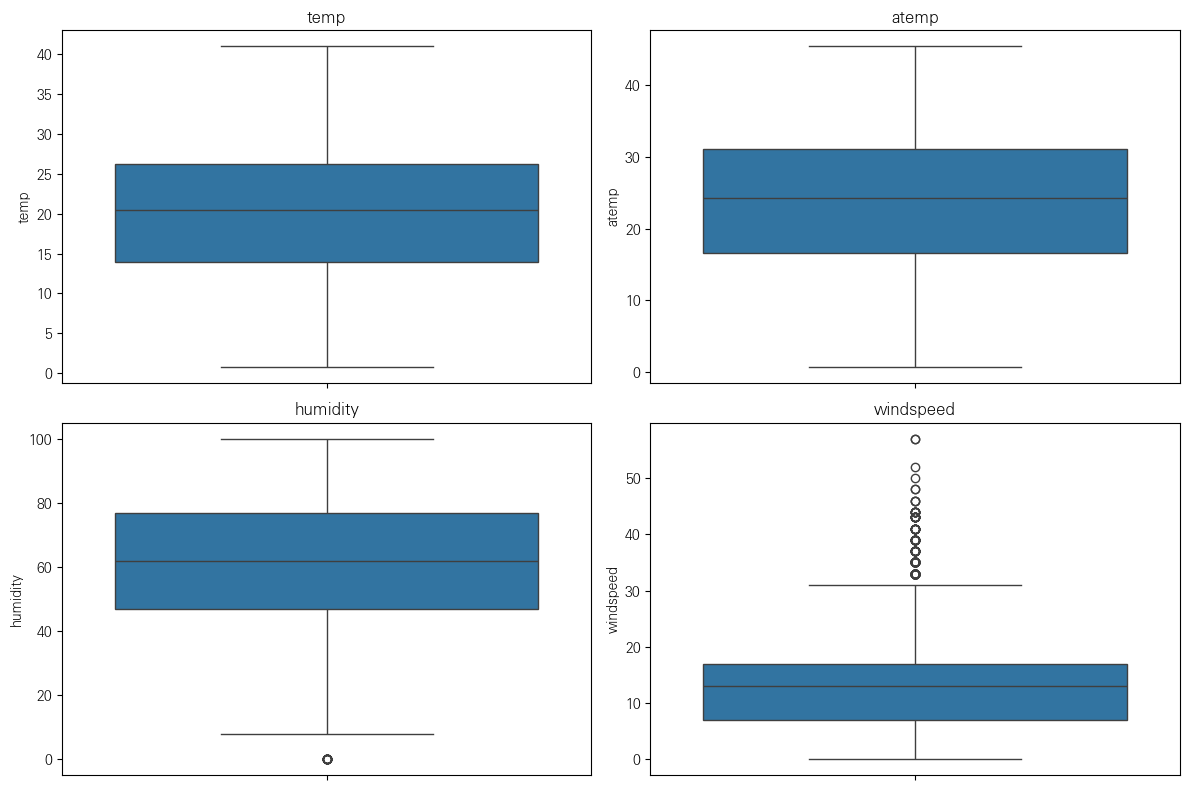

In [12]:
# boxplot으로 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns

num_cols1 = ['temp', 'atemp', 'humidity', 'windspeed']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols1):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=train, y=col)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

windspeed mapping 적용

humidity mapping 적용


-----------------

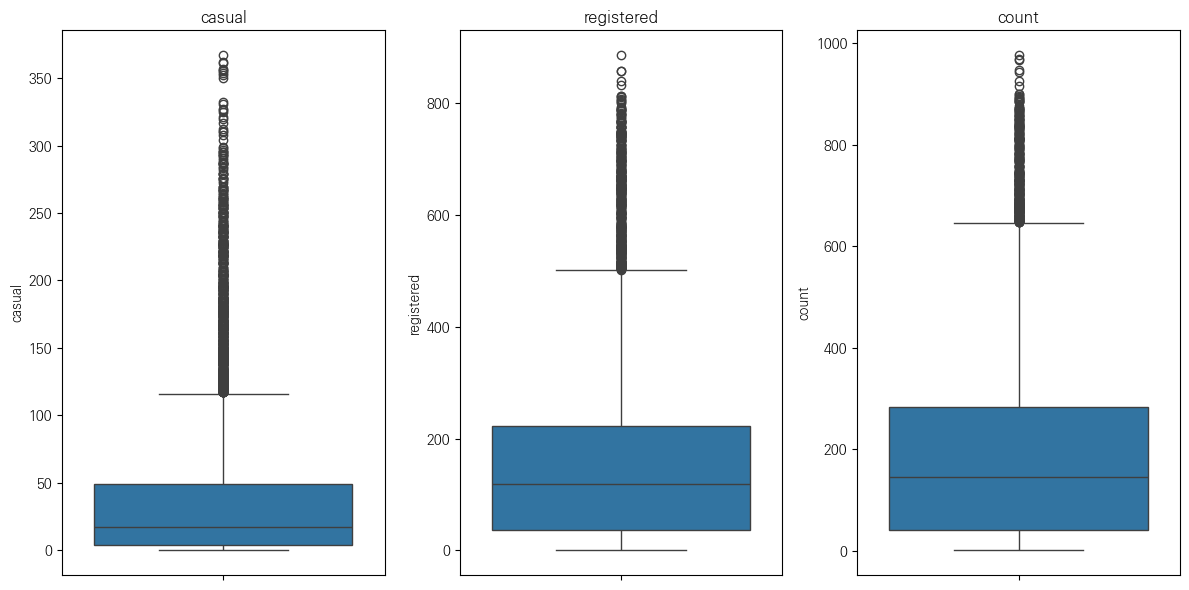

In [13]:
# boxplot으로 이상치 확인 (2)
num_cols2 = ['casual', 'registered', 'count']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols2):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=train, y=col)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

casual / registered / count 모두 outlier 존재 → 특히 상단에서 다수의 outlier 확인됨 → 자연스러운 현상임 (이런 분포가 많이 나옴).

        casual → 상위 소수 사용자들이 비정상적으로 많이 대여한 경우 존재  
        registered → 상위 고정 사용자 그룹의 대여 패턴 존재  
        (count → 당연히 casual + registered 합 → 같이 이상치 발생)



-----------------

### 구간 매핑

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\2603263693.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()


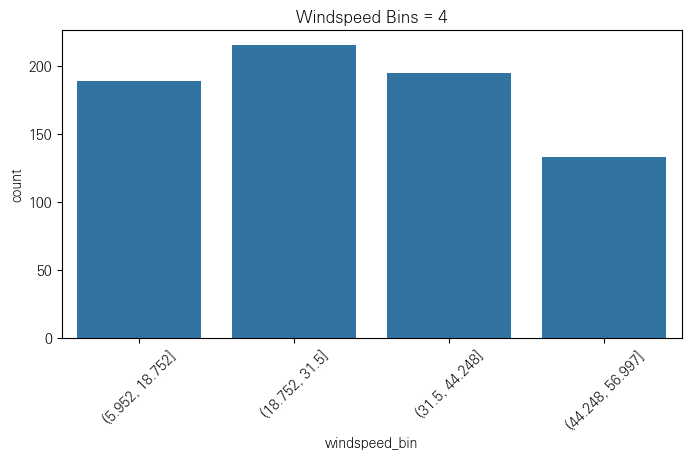

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\2603263693.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()


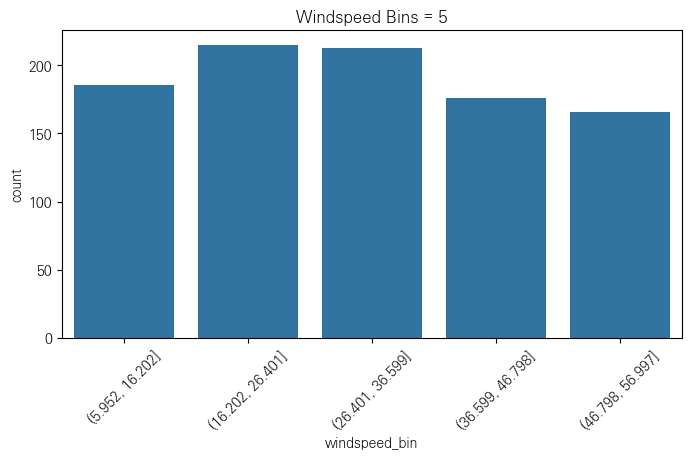

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\2603263693.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()


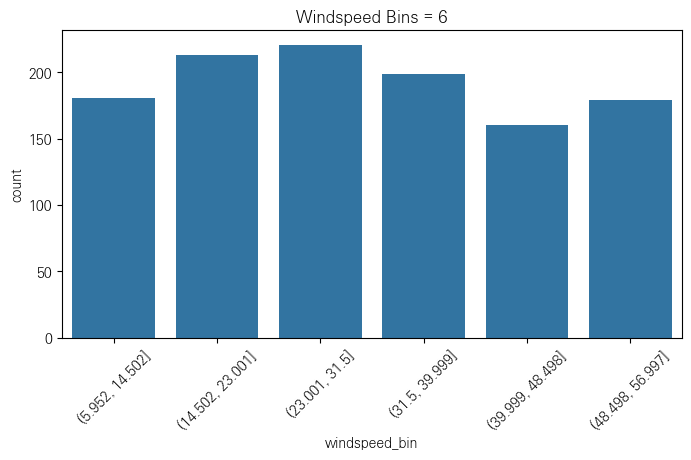

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\2603263693.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()


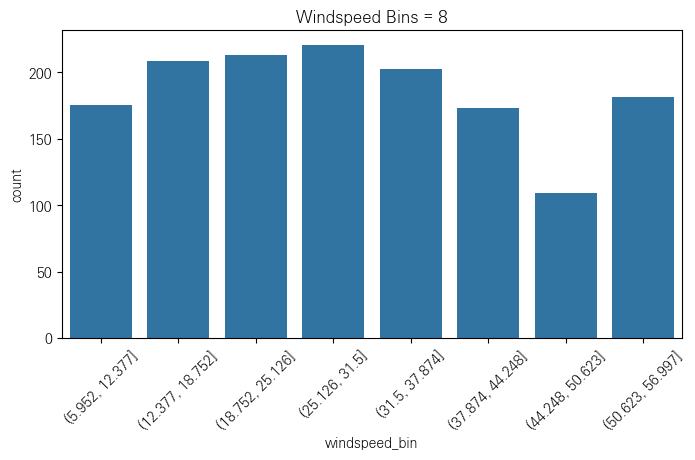

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\2603263693.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()


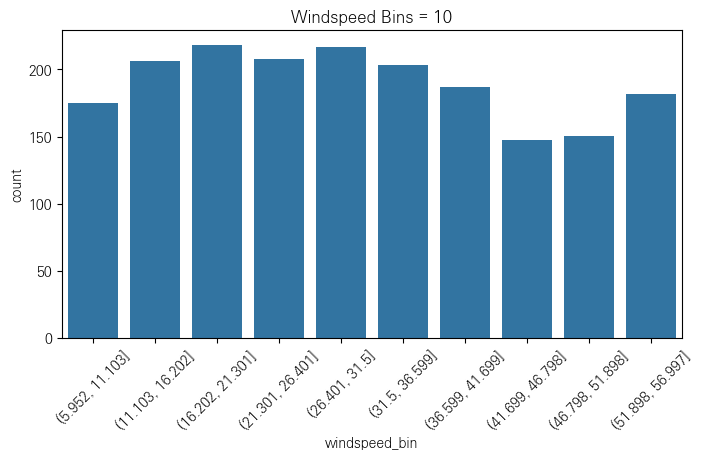

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# windspeed 시각화용 함수
def plot_windspeed_bins(n_bins):
    # 0 제외
    windspeed_nonzero = train[train['windspeed'] != 0]['windspeed']
    bins = pd.cut(windspeed_nonzero, bins=n_bins)
    
    # 각 bin 별 count 평균 구하기
    df_bin = train[train['windspeed'] != 0].copy()
    df_bin['windspeed_bin'] = bins
    grouped = df_bin.groupby('windspeed_bin')['count'].mean().reset_index()

    # 시각화
    plt.figure(figsize=(8, 4))
    sns.barplot(data=grouped, x='windspeed_bin', y='count')
    plt.title(f'Windspeed Bins = {n_bins}')
    plt.xticks(rotation=45)
    plt.show()

# 사용 예시
for n in [4, 5, 6, 8, 10]:
    plot_windspeed_bins(n)


C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\487617694.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()


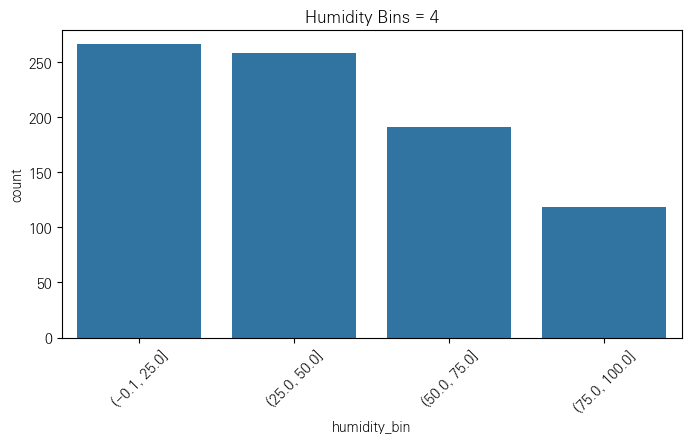

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\487617694.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()


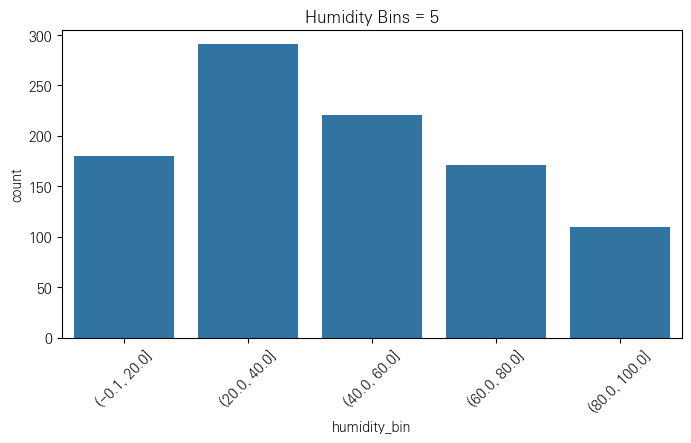

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\487617694.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()


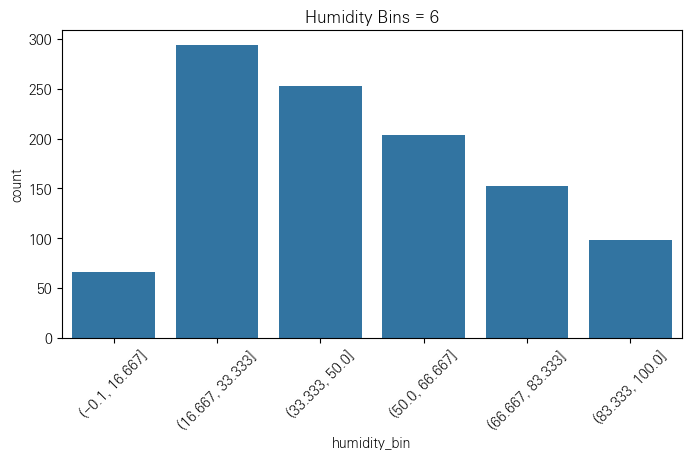

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\487617694.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()


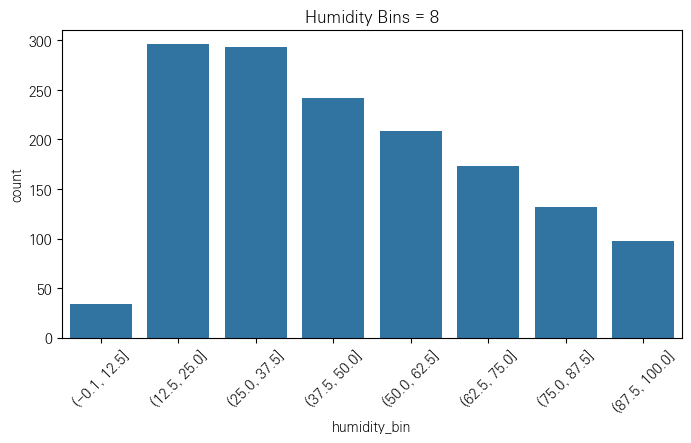

C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\487617694.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()


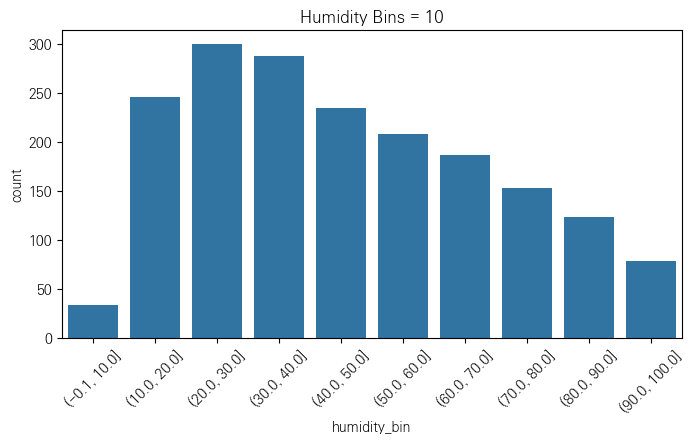

In [15]:
def plot_humidity_bins(n_bins):
    bins = pd.cut(train['humidity'], bins=n_bins)
    
    df_bin = train.copy()
    df_bin['humidity_bin'] = bins
    grouped = df_bin.groupby('humidity_bin')['count'].mean().reset_index()

    plt.figure(figsize=(8, 4))
    sns.barplot(data=grouped, x='humidity_bin', y='count')
    plt.title(f'Humidity Bins = {n_bins}')
    plt.xticks(rotation=45)
    plt.show()

# 사용 예시
for n in [4, 5, 6, 8, 10]:
    plot_humidity_bins(n)


### 이상치 처리 및 구간화

#### Windspeed

- 0값이 많고, 값들이 띄엄띄엄 존재하여 모델 해석에 어려움 발생 가능.
- 6~7구간 정도로 단순화하여 패턴을 더 명확하게 파악하고 모델 학습 안정성 확보 예정.

#### Humidity

- 값은 연속적이나 20~60% 구간에 데이터가 집중되어 있음 → 특정 구간에서 noise 발생 가능성 존재.
- 현재 10구간 정도는 분포를 적절히 반영하고 있어 그대로 유지하기로 결정.


In [16]:
# windspeed 0 제외
windspeed_nonzero = train[train['windspeed'] != 0]['windspeed']

# 구간 나누기
n_bins_wind = 6
bins_wind = pd.cut(windspeed_nonzero, bins=n_bins_wind)

# windspeed_bin 컬럼 생성
df_bin = train[train['windspeed'] != 0].copy()
df_bin['windspeed_bin'] = bins_wind

# 각 bin → 중앙값 구하기 (진짜 mapping용)
bin_centers_wind = df_bin.groupby('windspeed_bin')['windspeed'].mean()

# mapping dict 만들기
bin_center_dict_wind = {}
for interval in bin_centers_wind.index.categories:
    bin_center_dict_wind[interval] = bin_centers_wind.loc[interval]

# mapping 함수
def map_windspeed(value):
    if value == 0:
        return 0
    for interval in bin_center_dict_wind:
        if value in interval:
            return bin_center_dict_wind[interval]
    return value

# 최종 mapped 컬럼 생성
train['windspeed_mapped'] = train['windspeed'].apply(map_windspeed)
test['windspeed_mapped'] = test['windspeed'].apply(map_windspeed)


C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\2632326608.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers_wind = df_bin.groupby('windspeed_bin')['windspeed'].mean()


In [17]:
# 구간 나누기
n_bins_hum = 10
bins_hum = pd.cut(train['humidity'], bins=n_bins_hum)

# humidity_bin 컬럼 생성
df_bin_hum = train.copy()
df_bin_hum['humidity_bin'] = bins_hum

# 각 bin → 중앙값 구하기 (매핑용)
bin_centers_hum = df_bin_hum.groupby('humidity_bin')['humidity'].mean()

# mapping dict 만들기
bin_center_dict_hum = {}
for interval in bin_centers_hum.index.categories:
    bin_center_dict_hum[interval] = bin_centers_hum.loc[interval]

# mapping 함수
def map_humidity(value):
    for interval in bin_center_dict_hum:
        if value in interval:
            return bin_center_dict_hum[interval]
    return value

# 최종 mapped 컬럼 생성
train['humidity_mapped'] = train['humidity'].apply(map_humidity)
test['humidity_mapped'] = test['humidity'].apply(map_humidity)


C:\Users\ypsoo\AppData\Local\Temp\ipykernel_13968\1740611126.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_centers_hum = df_bin_hum.groupby('humidity_bin')['humidity'].mean()


## 4. 변수별 분석
- 시간 관련 변수
- 범주형 변수 (season, holiday, workingday, weather)
- 수치형 변수 (temp, atemp, humidity, windspeed)

In [18]:
# 변수별 기본 통계 확인
train.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454
year,10886.0,2011.501929,2011.0,2011.0,2012.0,2012.0,2012.0,0.500019
month,10886.0,6.521495,1.0,4.0,7.0,10.0,12.0,3.444373


In [19]:
# 0값이 많은 변수 확인
zero_counts = (train == 0).sum()

print('0값')
zero_counts[zero_counts > 0]

0값


holiday             10575
workingday           3474
humidity               22
windspeed            1313
casual                986
registered             15
hour                  455
weekday              1551
windspeed_mapped     1313
dtype: int64

### 계절 이상

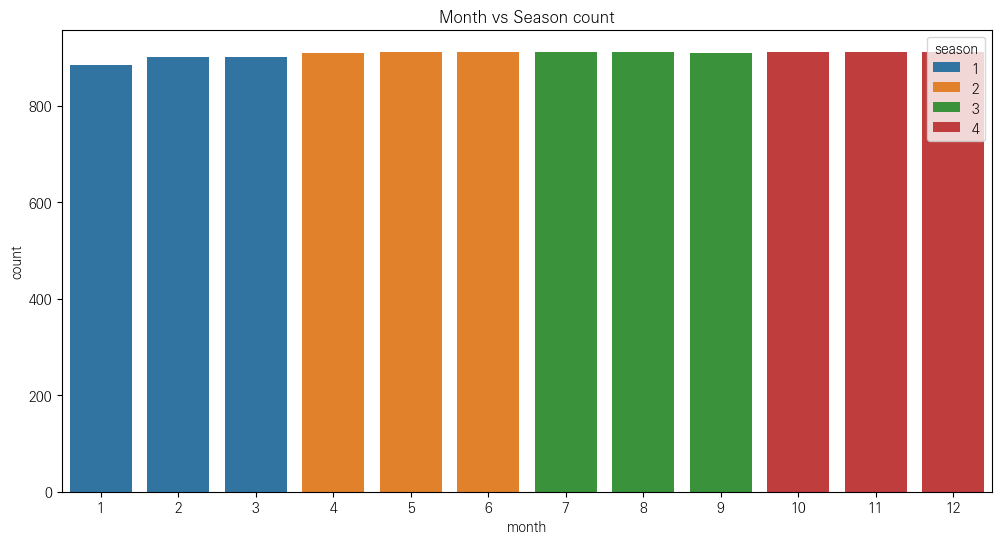

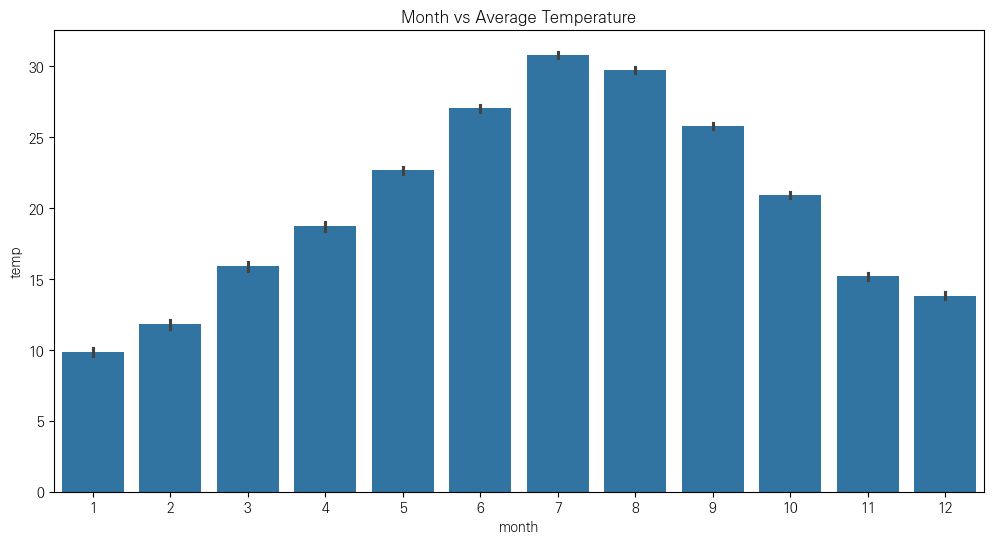

In [20]:
# month별 season count 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='month', hue='season')
plt.title('Month vs Season count')
plt.show()

# month별 평균 온도 시각화 → 계절 적합성 확인
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='month', y='temp')
plt.title('Month vs Average Temperature')
plt.show()


Season 값 변경 비율: 66.62%


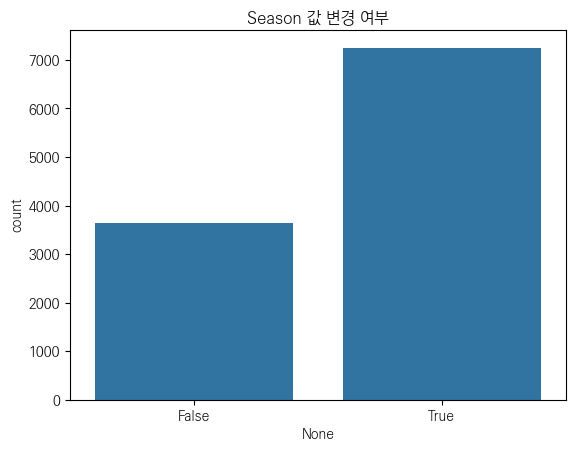

In [21]:
# 기존 season 컬럼 따로 복사 (Series로만)
season_orig = train['season'].copy()

# 새로운 season 값 계산 (Series로)
season_new = train['month'].apply(lambda m: 4 if m in [12,1,2] 
                                  else 1 if m in [3,4,5]
                                  else 2 if m in [6,7,8]
                                  else 3)

# 변경 여부 계산
season_changed = season_orig != season_new

# 변경 비율 출력
changed_ratio = season_changed.mean() * 100
print(f"Season 값 변경 비율: {changed_ratio:.2f}%")

# 시각화
sns.countplot(x=season_changed)
plt.title('Season 값 변경 여부')
plt.show()


### Season 컬럼 처리 방안

EDA 과정에서 season 컬럼 값이 월(month)과 일부 어긋나는 점(예: 1월이 봄으로 분류됨)을 확인하였다.  
- 약 2/3 정도가 실제로 season 매핑 기준과 다르게 들어가 있었다.  
다만 본 프로젝트에서는 season을 범주형 변수로 그대로 사용하며, 월, 시간 등의 정보도 함께 활용하므로 재매핑은 적용하지 않기로 했다.  
train/test 간 일관성 유지를 고려하여 원본 값을 그대로 유지했다.


#### 상관관계 시각화

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

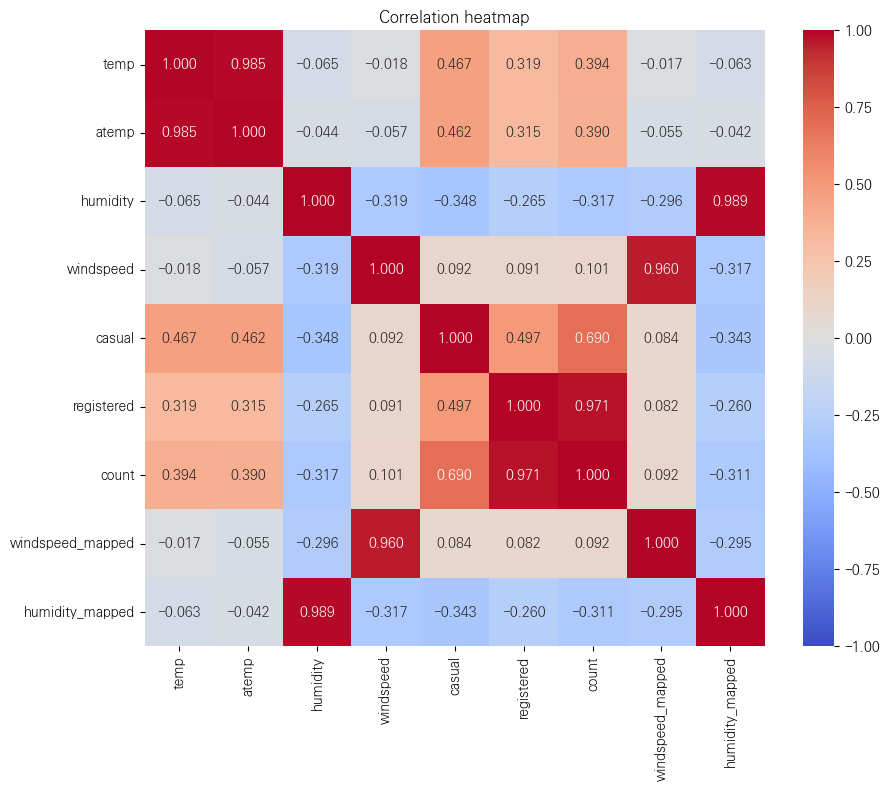

In [23]:
# 수치형 변수만 대상으로 상관계수 계산
corr_matrix = train.select_dtypes(include=['float64', 'int64']).corr()

# heatmap 다시 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()


In [24]:
# 수치형 변수만 대상으로 count와의 상관계수 확인
train.select_dtypes(include=['float64', 'int64']).corr()['count'].sort_values(ascending=False)


count               1.000000
registered          0.970948
casual              0.690414
temp                0.394454
atemp               0.389784
windspeed           0.101369
windspeed_mapped    0.091695
humidity_mapped    -0.311317
humidity           -0.317371
Name: count, dtype: float64

### 변수 간 상관관계 및 상호작용 분석

- temp 변수와 count 간에는 온도 상승에 따라 대여량이 증가하는 경향이 확인됨. 특히 15~25도 구간에서 대여량이 높은 패턴이 나타남.
- count 변수와 registered(0.989), casual(0.847) 변수 간 매우 강한 양의 상관관계가 존재함.
- temp(0.408), atemp(0.407)와 count 간에도 중간 정도의 양의 상관관계가 확인됨.
- humidity(-0.354)와 count 간에는 음의 상관관계가 나타나, 습도가 높을수록 대여량이 감소하는 경향이 확인됨.
- weather, holiday, workingday 등의 변수는 count와 상대적으로 약한 상관관계를 보임.


### count와 다른 수치형 변수의 관계

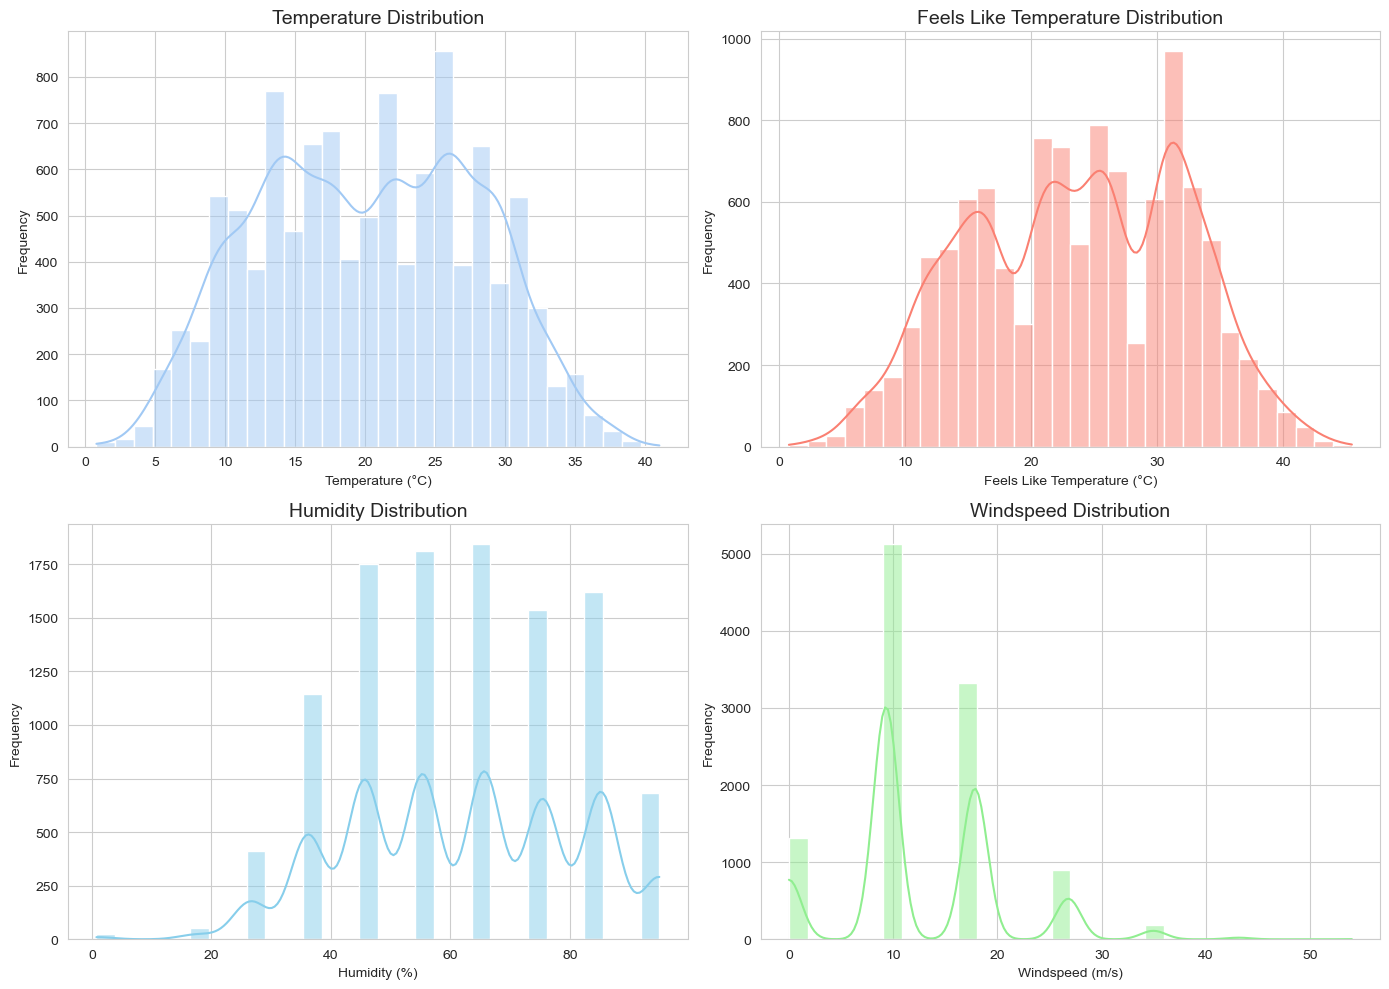

In [25]:
# 시각화 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel') 
sns.set_style('whitegrid')  

# Figure 구성
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 온도
sns.histplot(train['temp'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution', fontsize=14)
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

# 체감 온도
sns.histplot(train['atemp'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Feels Like Temperature Distribution', fontsize=14)
axes[0, 1].set_xlabel('Feels Like Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')

# 습도
sns.histplot(train['humidity_mapped'], bins=30, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Humidity Distribution', fontsize=14)
axes[1, 0].set_xlabel('Humidity (%)')
axes[1, 0].set_ylabel('Frequency')

# 풍속
sns.histplot(train['windspeed_mapped'], bins=30, kde=True, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Windspeed Distribution', fontsize=14)
axes[1, 1].set_xlabel('Windspeed (m/s)')
axes[1, 1].set_ylabel('Frequency')

# 레이아웃 정렬
plt.tight_layout()
plt.show()


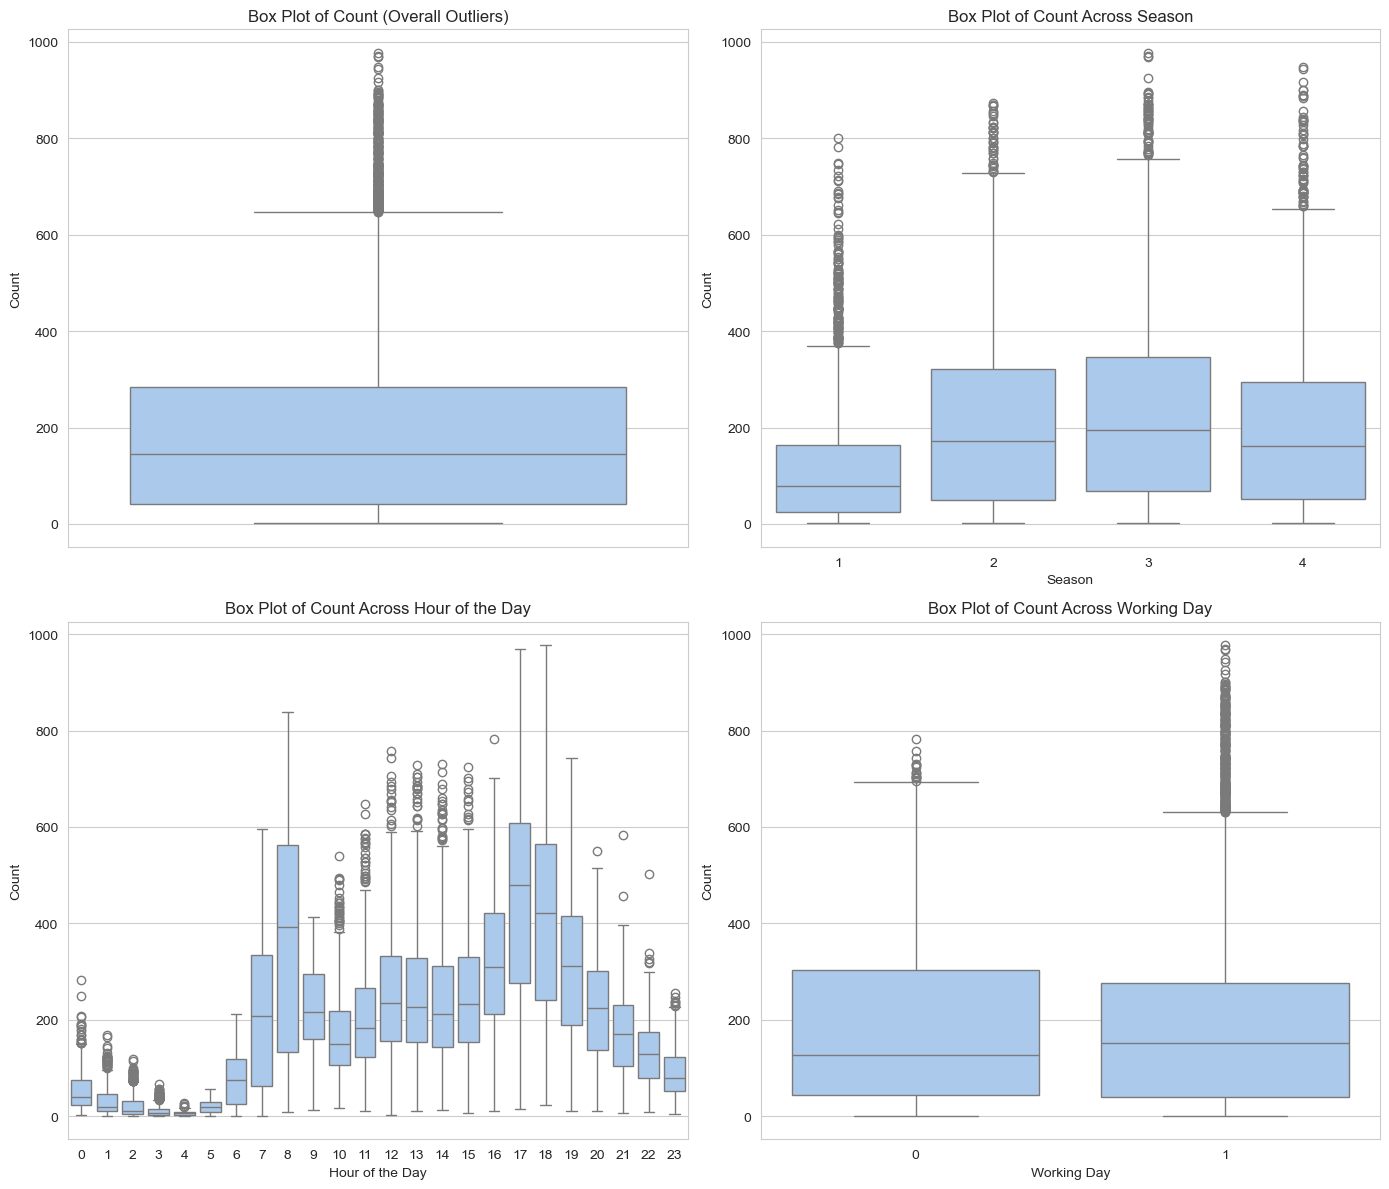

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure 구성
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(14, 12)

# 전체 count 이상치
sns.boxplot(data=train, y="count", orient="v", ax=axes[0][0])
axes[0][0].set(ylabel='Count', title="Box Plot of Count (Overall Outliers)")

# season별 count 이상치
sns.boxplot(data=train, y="count", x="season", orient="v", ax=axes[0][1])
axes[0][1].set(xlabel='Season', ylabel='Count', title="Box Plot of Count Across Season")

# hour별 count 이상치
sns.boxplot(data=train, y="count", x="hour", orient="v", ax=axes[1][0])
axes[1][0].set(xlabel='Hour of the Day', ylabel='Count', title="Box Plot of Count Across Hour of the Day")

# workingday별 count 이상치
sns.boxplot(data=train, y="count", x="workingday", orient="v", ax=axes[1][1])
axes[1][1].set(xlabel='Working Day', ylabel='Count', title="Box Plot of Count Across Working Day")

# layout 조정
plt.tight_layout()
plt.show()


### Count 분포 및 주요 변수별 분석

#### 전체 Count 이상치 (Overall)

- 전반적으로 count 값이 약 300~400 이상부터 이상치로 확인됨.
- 최대치는 약 1000까지 존재하여 사용량 폭이 매우 큼.
- log 변환 적용 시 모델 안정화에 도움이 될 것으로 판단됨.

#### Season별 Count

- 모든 season(1~4)에 고르게 이상치가 존재함.
- 겨울(season=1)은 중앙값이 낮고 분포가 아래쪽으로 치우침 → 이용량 적음.
- 여름/가을(season=3,4)은 중앙값이 높고 이상치가 많이 발생함 → 이용량이 많은 구간임.

#### Hour별 Count (가장 정보량이 많은 feature)

- 출퇴근 시간대에 뚜렷한 패턴이 확인됨.
- 8~9시(출근), 17~18시(퇴근) 시간대에 피크 발생.
- 새벽/밤 시간대에는 이용량이 거의 없음.
- hour feature는 매우 유효한 변수로 판단됨.

#### Workingday 여부

- workingday=1(평일)은 중앙값이 높고 사용량이 고르게 분포됨. 높은 이상치(900대)도 다수 확인됨.
- workingday=0(휴일)은 중앙값이 낮고 분산이 큼. 이용량이 높은 경우와 거의 없는 경우가 양극화되는 경향을 보임.

#### 종합 정리

- hour 변수는 매우 강한 feature로 출퇴근 시간대 패턴을 명확히 반영함.
- season 변수는 계절별 이용량 차이를 잘 설명함.
- workingday 변수는 평일/휴일 간 뚜렷한 패턴 차이를 보임.
- count 변수는 이상치가 존재하므로 log 변환 적용이 필요함.


### count 로그 변환

In [27]:
# count → log1p 변환
import numpy as np


train['log_count'] = np.log1p(train['count'])

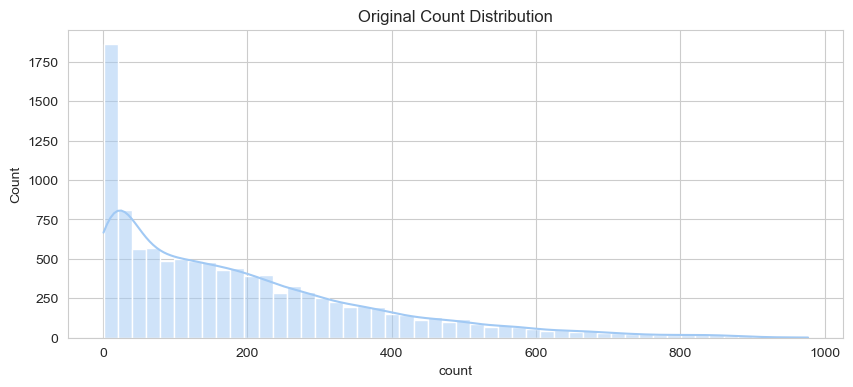

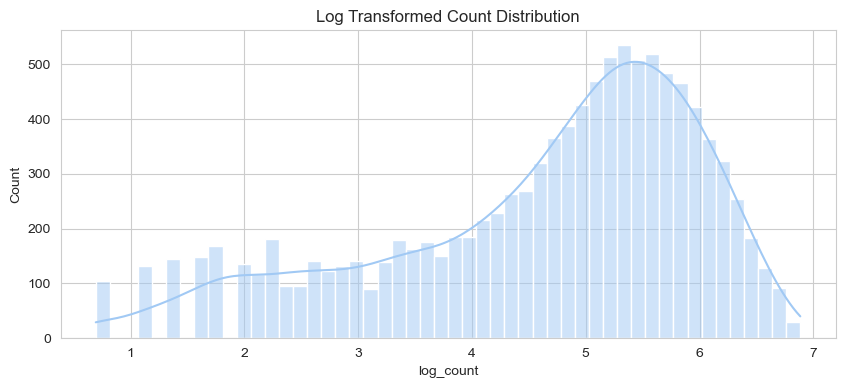

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 원래 count 분포
plt.figure(figsize=(10,4))
sns.histplot(train['count'], bins=50, kde=True)
plt.title('Original Count Distribution')
plt.show()

# log 변환된 count 분포
plt.figure(figsize=(10,4))
sns.histplot(train['log_count'], bins=50, kde=True)
plt.title('Log Transformed Count Distribution')
plt.show()


### Count 변수 로그 변환 적용

자전거 대여량(count) 데이터는 오른쪽으로 긴 꼬리(Right-skewed)를 가진 비정규 분포다.  
이 상태로 학습 시 모델이 높은 count에 과도하게 민감해지고, 일반적인 패턴 학습에 어려움이 발생한다.  
따라서 log1p 변환을 적용하여 데이터를 보다 정규분포에 가깝게 변환하기로 결정하였다.  
변환 후 모델의 학습 안정성 및 일반화 성능이 향상될 것으로 기대된다.


## 5. 인사이트 정리

+ 최종 feature 목록 (X변수)

| Feature         | 설명                             |
| --------------- | ------------------------------ |
| `season`        | 기존 season 변수 (1\~4) — 기존 값 유지  |
| `holiday`       | 휴일 여부                          |
| `workingday`    | 근무일 여부                         |
| `weather`       | 날씨 상태 (1\~4)                   |
| `temp`          | 기온 (℃)                         |
| `atemp`         | 체감온도 (℃)                       |
| `humidity_mapped`  | 습도 구간화 변수 (category형)          |
| `windspeed_mapped` | 풍속 구간화 변수 (category형)          |
| `year`          | 연도 (2011, 2012)                |
| `month`         | 월 (1\~12)                      |
| `day`           | 일 (1\~31)                      |
| `hour`          | 시간 (0\~23)                     |
| `weekday`       | 요일 (category형, 0\~6 또는 요일명 매핑) |
  
        
+ Target 변수 (y)


| Feature     | 설명                                        |
| ----------- | ----------------------------------------- |
| `log_count` | `count` 변수의 log1p 변환값 → 모델 학습 target으로 사용 |



### EDA 주요 결과 요약

#### 📅 날짜 및 시간 관련 변수

- hour별 대여량 분포는 뚜렷한 패턴이 확인됨.
- 출근 시간대(7~9시)와 퇴근 시간대(17~19시)에 급증하는 경향을 보임.
- 야간(0~6시)에는 대여량이 매우 적은 것으로 나타남.

- workingday 여부에 따라 hour별 패턴 차이가 존재함.
- 주말보다 평일에 출퇴근 시간대 피크가 더 뚜렷하게 나타남.

- season별 대여량은 큰 차이를 보이지 않으나 겨울철(Season 4)에도 대여가 활발히 이루어짐.
- 다만 기존 season 컬럼과 실제 기후적 분포 사이에는 일부 불일치가 존재하였음.
- 테스트 데이터 적용 시 불필요한 오버엔지니어링을 피하기 위해 해당 season 재매핑은 적용하지 않기로 결정함.

#### 🌡️ 온도 및 체감 온도

- temp와 atemp 모두 대체로 정규분포에 가까운 분포를 보임.
- 여름철(6~8월)에 가장 높은 온도를 기록하며, 해당 시기 대여량도 증가하는 경향을 보임.

- temp와 atemp 간 상관관계는 높아 정보 중복이 일부 발생함.
- 모델링 시 두 변수의 선택적 활용이 필요함.

#### 💧 습도 (Humidity)

- humidity는 전 구간에 걸쳐 고르게 분포하지만, 높은 습도(80% 이상)에서는 다소 감소하는 패턴이 나타남.
- 습도가 높을수록 대여량 감소 경향이 확인됨.

#### 🌬️ 풍속 (Windspeed)

- windspeed는 0값 비중이 높아 데이터 누락 가능성이 의심됨.
- 이후 머신러닝 기반으로 0값에 대한 예측 보정 후 활용함.

- 풍속이 높을수록 대여량은 감소하는 경향을 보임.
- 다만 대여량에 미치는 영향은 습도에 비해 상대적으로 적은 것으로 확인됨.

#### 📈 Count 변수 특성

- 원본 count 변수는 심하게 오른쪽으로 치우친(skewed) 분포를 나타냄.
- 로그 변환(log1p) 적용 후 거의 정규분포에 가까운 형태로 개선됨.
- 이를 통해 모델 학습 시 안정성을 확보할 수 있을 것으로 기대됨.

- Boxplot 분석 결과, 전반적으로 높은 이상치가 존재함. 이는 출퇴근 시간대 등 특정 상황에서 자연스러운 현상으로 판단됨.
- 이상치 제거는 적용하지 않기로 결정함.

#### 종합 결론

- EDA를 통해 변수별 대여량에 대한 영향과 분포 특성을 확인함.
- 시간, 기온, 습도, 풍속 등의 변수는 대여량 예측에 중요한 기여를 할 것으로 기대됨.
- 로그 변환 적용으로 모델 학습 성능 향상이 가능할 것으로 판단됨.


### 데이터 전처리 및 Feature Engineering 결과

#### 📅 날짜 및 시간 관련 파생 변수 생성

- datetime 컬럼을 기반으로 year, month, day, hour, weekday 변수를 새로 생성하였음.
- weekday는 요일 문자열로 추출한 후 category형으로 변환하였음.
- season 변수의 재매핑 여부를 검토하였으나, 모델 안정성을 위해 기존 값을 그대로 유지하기로 결정하였음.

#### 🌬️ 풍속 (windspeed) 데이터 정제

- windspeed 변수에서 0값 비율이 비정상적으로 높아, 단순 측정 오류로 판단됨.
- windspeed == 0인 샘플에 대해 RandomForestRegressor를 이용하여 예측값으로 보정하였음.
- 이후 전체 windspeed 변수는 보정된 값을 반영하여 활용하기로 하였음.

#### 💧 습도 (humidity), 🌬️ 풍속 (windspeed) 구간화 (mapping)

- 모델 해석력을 높이고 비선형적 관계를 반영하기 위해 humidity, windspeed 변수를 일정 구간으로 binning하였음.
- 구간 개수는 시각화를 통해 적절한 수준으로 선정하였음.
- 구간화된 변수는 새로운 category형 변수로 생성하여 모델링에 활용하도록 구성하였음.

#### 📈 Target (count) 변수 변환

- 원본 count 변수는 심하게 치우친(skewed) 분포를 나타내어 로그 변환을 적용하였음.
- log1p(count) 형태로 변환한 log_count 변수를 모델 학습용 target으로 활용하기로 결정하였음.
- 이상치 확인 결과, 출퇴근 시간대 등 자연스러운 대여량 급증 현상이므로 별도의 이상치 삭제는 적용하지 않기로 하였음.

#### ❌ 삭제(드롭)한 컬럼

- datetime: 파생 변수로 정보 반영이 완료되었으므로 삭제하였음.
- casual, registered: 훈련 데이터에서만 존재하며 test 데이터에는 없으므로 삭제하였음. 또한 이 둘의 합이 count 변수로 반영되므로 target에만 활용함.
- windspeed 원본 컬럼은 삭제하지 않고, 보정된 값을 덮어쓰기 형태로 활용하였음.

#### 종합 결론

- EDA 및 데이터 정제를 통해 전체적인 데이터 품질과 feature 구성을 개선하였음.
- 시간 관련 변수, 온도, 습도, 풍속 등이 대여량 예측에 주요한 영향을 줄 것으로 확인되었음.
- 로그 변환과 구간화를 통해 변수 분포의 안정성도 확보하였음.
- 이러한 정제 결과를 기반으로 머신러닝 모델 학습을 진행할 예정임.
